In [1]:
import json
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
tp='cle_radius.csv'
all_data=pd.read_csv(tp)
df=all_data.drop(['identifier/fips', 'identifier/apn', 'identifier/apnOrig', 'summary/propIndicator', 'summary/proptype','location/geoid', 'identifier/attomId', 'sale/amount/salecode', 'sale/amount/saledisclosuretype', 'address/matchCode', 'address/postal2', 'address/postal3', 'location/accuracy', 'address/country', 'sale/amount/saledocnum', 'summary/propLandUse', 'location/elevation' ], axis=1)
df.dtypes
df2=df.merge(income2, how='inner', on= 'address/postal1')
df2

NameError: name 'income2' is not defined

In [3]:
map=df.loc[:,['address/line1', 'address/locality', 'address/countrySubd', 'address/postal1', "sale/amount/saleamt", 'sale/amount/salerecdate', 'location/latitude', 'location/longitude']]
maps=map.rename(columns={'address/line1': 'street_1', 'address/locality': 'city', 'address/countrySubd': 'state', 'address/postal1': 'zip', 'sale/amount/saleamt': 'sale_price', 'sale/amount/salerecdate': 'date', 'location/latitude': 'latitude', 'location/longitude':'longitude'}) 
map5=maps.dropna(how='any')

map5.to_csv('map5.csv')

In [4]:

plt.figure(figsize=(10,6))
plt.scatter(df2['location/longitude'],y=df2['location/latitude'],alpha=0.1)
plt.title("Distribution of households",size=16)

NameError: name 'df2' is not defined

<Figure size 720x432 with 0 Axes>

In [5]:
house=pd.read_csv('house.csv', dtype={'name': int, 'med/housing':int })
house1=house.drop(['geoid', 'B25077001, Error'], axis=1)
house2=house1.rename(columns={'name': 'address/postal1'})
houses=house2.iloc[1:]
houses2=houses.loc[houses["med/housing"] > 1, :]


In [6]:
dem=pd.read_csv('demo.csv', dtype={'1':float, 'total':int, 'address/postal1':int, '2':int, '3':int, '4':int})
dem2=dem.iloc[1:]
dem3=dem2.loc[:, ["address/postal1", "total", "1", "2", "3", "4"]]
dem3['1per']=(dem3['1']/dem3['total'])*100
dem3['2per']=(dem3['2']/dem3['total'])*100
dem3['4per']=(dem3['4']/dem3['total'])*100


In [7]:
pop=pd.read_csv('pop.csv', dtype={'population':float, 'address/postal1':int})
pop2=pop.iloc[1:]
pop3=pop2.loc[:, ["address/postal1", "population" ]]


In [8]:
edu=pd.read_csv('education.csv', dtype={'total':float, 'address/postal1':int, 'Bachelors':int, 'Masters':int, 'HighSchool':int, 'Associates':int, 'Professional':int, 'Doctorate':int})
edu2=edu.iloc[1:]
edu3=edu2.loc[:, ["address/postal1", "total", "Bachelors", "Masters", "HighSchool", "Associates", "Professional", "Doctorate"]]
edu3['bachper']=(edu3['Bachelors']/edu3['total'])*100
edu3['docper']=(edu3['Doctorate']/edu3['total'])*100
edu3['mastper']=(edu3['Masters']/edu3['total'])*100
edu3['HSper']=(edu3['HighSchool']/edu3['total'])*100

In [9]:


age=pd.read_csv('age.csv', dtype={'total':float, 'address/postal1':int})
age2=age.iloc[1:]
age3=age2.drop(['geoid', 'B01002000.5', 'B01002000.5, Error', 'B01002001, Error', 'male', 'female', 'B01002002, Error', 'B01002003, Error'], axis=1)


In [10]:
merge1=dem3.merge(pop3, how='inner', on='address/postal1' )
merge2=merge1.merge(edu3, how='outer', on='address/postal1')
merge3=merge2.merge(age3, how='inner', on='address/postal1')
merge3.head()

,address/postal1,total_x,1,2,3,4,1per,2per,4per,population,...,Masters,HighSchool,Associates,Professional,Doctorate,bachper,docper,mastper,HSper,total
0,16159,4824,4703.0,11,0,13,97.491708,0.228027,0.269486,4824.0,...,237,1571,316,0,0,13.741110,0.000000,6.742532,44.694168,47.3
1,43001,2890,2782.0,0,0,0,96.262976,0.000000,0.000000,2890.0,...,162,659,134,28,8,21.461657,0.411734,8.337622,33.916624,39.3
2,43002,3238,3020.0,98,0,97,93.267449,3.026560,2.995676,3238.0,...,298,221,431,109,11,41.672426,0.380097,10.297167,7.636489,32.7
3,43003,2895,2836.0,0,0,2,97.962003,0.000000,0.069085,2895.0,...,72,835,165,8,9,13.473787,0.440960,3.527683,40.911318,41.3
4,43004,25768,17174.0,6538,0,1092,66.648556,25.372555,4.237814,25768.0,...,1765,2887,1355,409,171,30.537597,0.995981,10.280156,16.815190,34.9


In [11]:
food_stamp=pd.read_csv('fs.csv', dtype={'PA/FS': int, 'NO_PA/FS':int, 'address/postal1':int})
fs=food_stamp.drop(['geoid', 'B19058001, Error', 'B19058002, Error', 'B19058003, Error'], axis=1)
fs['perc_fs']=(fs['PA/FS']/fs['B19058001'])*100
fs1=fs.drop(['B19058001'], axis=1)
fs2=fs1.iloc[1:]


In [12]:
med_inc2=pd.read_csv('medianincome.csv', dtype={'zipcode': int, 'median':int})
med_inc=med_inc2.rename(columns={'zipcode': 'address/postal1', 'median': 'median_income'})
income=med_inc.drop(['geoid', 'B19013001, Error'], axis=1)
income2 = income.iloc[1:]


In [13]:
df_res= df.loc[df["summary/propclass"] == "Single Family Residence / Townhouse", :]
b=df_res['address/postal1'].unique()
dataframe2=pd.DataFrame(b, columns=['zip'])


In [14]:
e=df_res['address/locality'].unique()
dataframe=pd.DataFrame(e, columns=['a'])
dataframe.to_csv("crime2.csv")

In [15]:
df_r=pd.read_csv('desc_df2.csv')


In [16]:
df_r['identifier/obPropId'].astype(str)
ids=df_r['identifier/obPropId'].tolist()


In [17]:
desc_df = df_res.sort_values("sale/amount/salerecdate", ascending=False)
desc_df2=desc_df.iloc[0:1000, :]
#desc_df2.to_csv('desc_df.csv')

In [18]:
desc_df3=desc_df2.loc[desc_df2["summary/yearbuilt"] > 1, :]

In [19]:
desc_df4=desc_df3.loc[desc_df3["sale/amount/saleamt"] > 5000, :]

In [20]:
desc_df5=desc_df4.loc[desc_df4['building/rooms/bathstotal'] > 0, :]

In [21]:
desc_df6=desc_df5.merge(income2, how='inner', on= 'address/postal1')

In [22]:
desc_df7=desc_df6.loc[desc_df6["median_income"] > 1, :]

In [23]:
desc_df8=desc_df7.loc[desc_df7["sale/amount/saleamt"] < 700000, :]

In [24]:
desc_df9=desc_df8.merge(fs2, how='inner', on='address/postal1')


In [25]:
desc_df10=desc_df9.merge(houses2, how='inner', on='address/postal1')

In [26]:
desc_df11=desc_df10.merge(merge3, how='inner', on='address/postal1')

In [27]:
desc_df12=desc_df11.loc[desc_df11["population"] > 1, :]

In [28]:
desc_df13=desc_df12.loc[desc_df12["location/distance"] < 45, :]

In [29]:
desc_df14=desc_df13.loc[desc_df13["LotSizeAcres"] > 0.0000, :]

In [30]:
desc_df15=desc_df14.loc[desc_df14['building/rooms/bathstotal'] < 7, :]

In [31]:
desc_df16=desc_df15.loc[desc_df15['LotSizeAcres'] < 1 , :]

In [32]:
desc_df17=desc_df16.loc[desc_df16['med/housing'] < 400000 , :]

In [33]:
desc_df18=desc_df17.loc[desc_df17["location/distance"] > 5, :]

In [34]:
ML_df=desc_df18.loc[:, ["LotSizeAcres", "med/housing", "median_income", "HSper", "bachper", "total", "perc_fs", "summary/yearbuilt", "mastper", "building/rooms/bathstotal", "population", "building/rooms/beds", "sale/amount/saleamt"]]
ML_df.to_csv('ML.csv')
ML_df['difference_house']=ML_df['sale/amount/saleamt']-ML_df['med/housing']
ML_df['year_b2']=2019-ML_df['summary/yearbuilt']
ML_df.describe()

,LotSizeAcres,med/housing,median_income,HSper,bachper,total,perc_fs,summary/yearbuilt,mastper,building/rooms/bathstotal,population,building/rooms/beds,sale/amount/saleamt,difference_house,year_b2
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,0.301933,134825.903614,55820.959337,30.116346,17.985778,40.866867,15.160673,1959.009036,7.137124,1.950301,24983.355422,3.118976,142787.265060,7961.361446,59.990964
std,0.208838,54639.806903,19216.100679,6.846992,8.020806,4.557220,11.092863,30.909686,4.219654,0.938019,12527.806308,0.715694,104339.766606,82072.699333,30.909686
min,0.033100,51200.000000,19026.000000,9.739401,2.977083,21.000000,0.530504,1860.000000,0.000000,1.000000,865.000000,1.000000,7000.000000,-294500.000000,1.000000
25%,0.137700,77600.000000,40316.000000,24.348681,11.921131,38.300000,6.870670,1934.500000,3.596701,1.000000,17732.000000,3.000000,60000.000000,-39500.000000,35.750000
50%,0.241700,142400.000000,53148.000000,31.471718,16.541762,41.800000,11.296426,1957.000000,6.614815,2.000000,22586.000000,3.000000,125000.000000,-6900.000000,62.000000
75%,0.432975,170400.000000,69094.000000,34.861842,25.240597,44.300000,25.014798,1983.250000,9.758846,3.000000,31074.000000,4.000000,197125.000000,41943.750000,84.500000
max,0.990000,316600.000000,120825.000000,46.625259,38.790773,52.500000,53.423423,2018.000000,21.158603,5.000000,63572.000000,6.000000,570000.000000,359000.000000,159.000000


In [35]:
corr_matrix=ML_df.corr()
corr_matrix['sale/amount/saleamt'].sort_values(ascending=False)

sale/amount/saleamt          1.000000
difference_house             0.854633
building/rooms/bathstotal    0.692130
med/housing                  0.625876
summary/yearbuilt            0.614102
median_income                0.609474
mastper                      0.598833
bachper                      0.586867
LotSizeAcres                 0.419465
building/rooms/beds          0.418329
total                        0.358182
population                   0.170047
HSper                       -0.491112
perc_fs                     -0.566272
year_b2                     -0.614102
Name: sale/amount/saleamt, dtype: float64

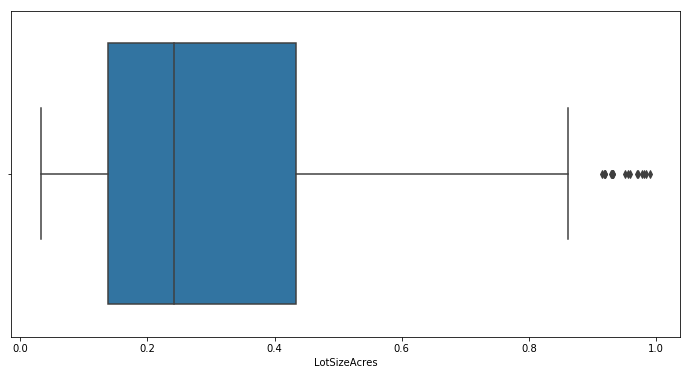

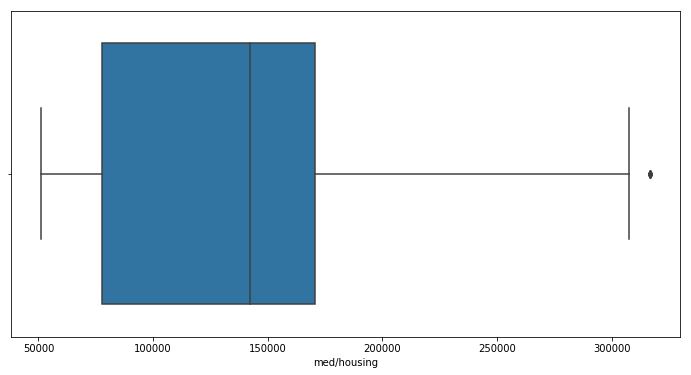

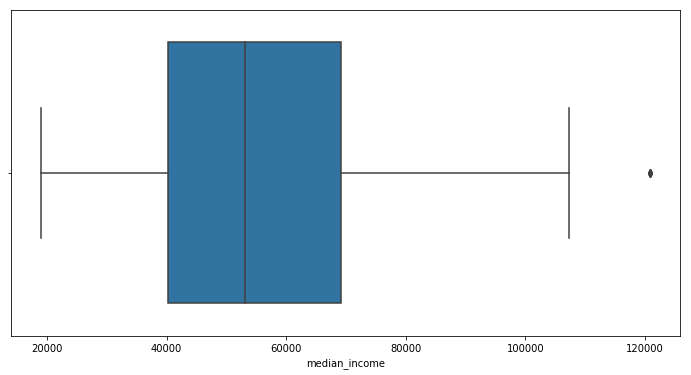

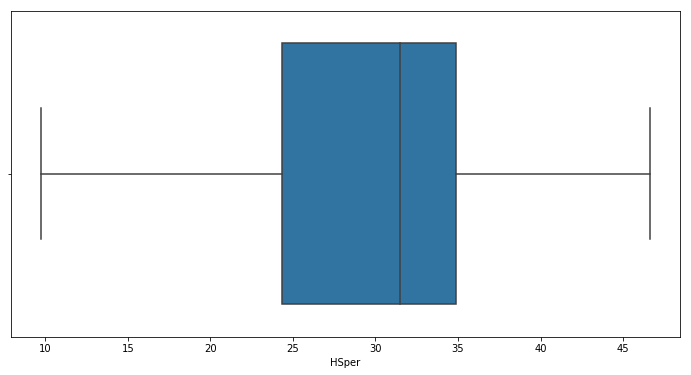

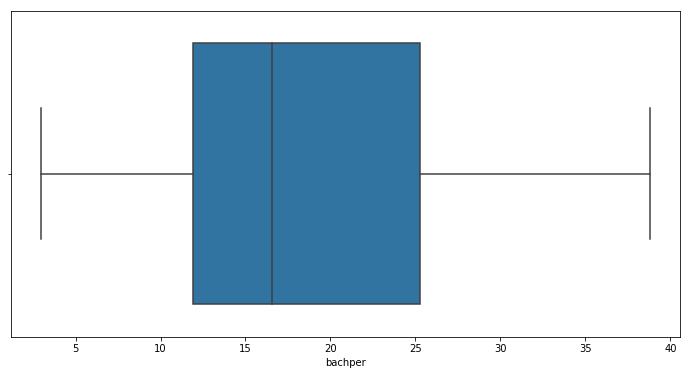

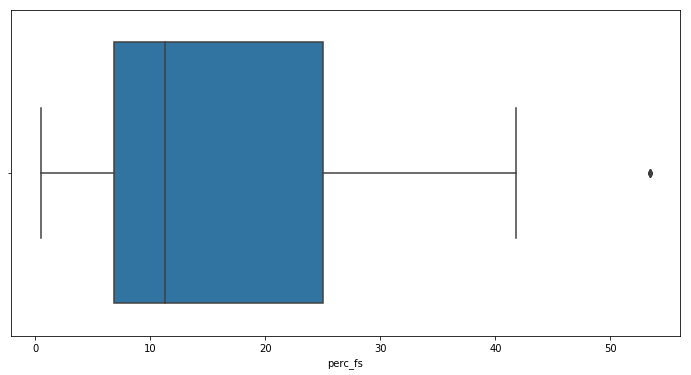

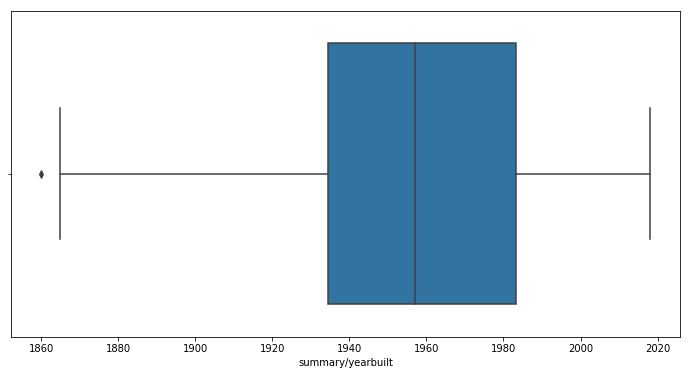

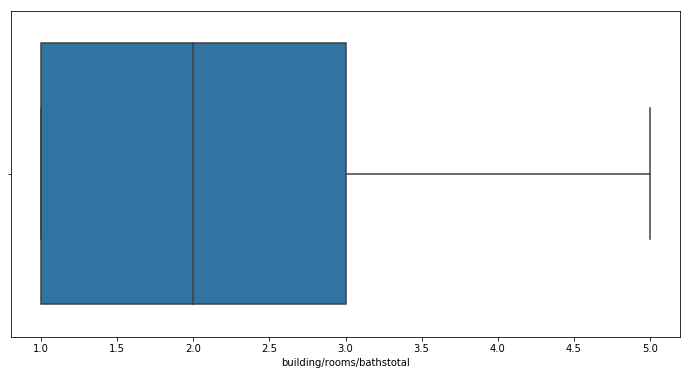

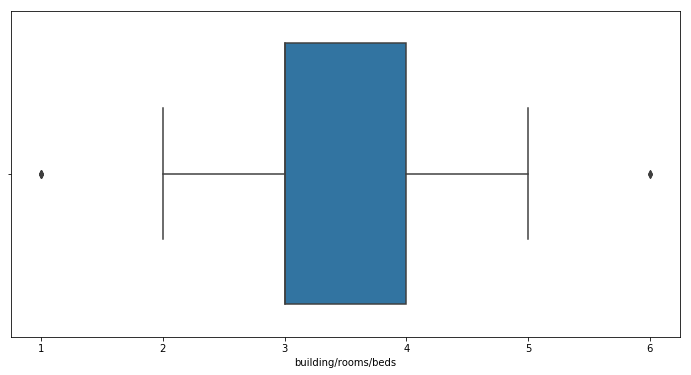

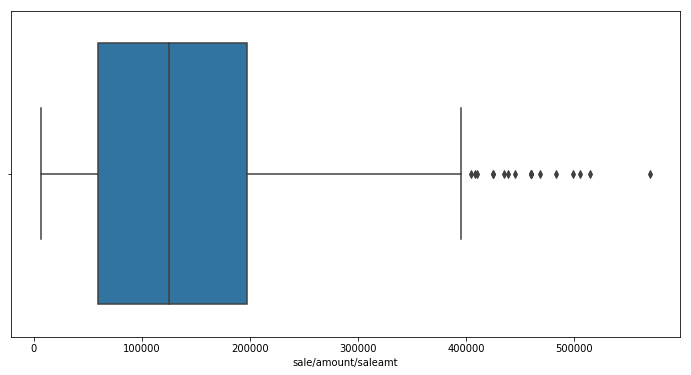

In [36]:
import seaborn as sns
num_features=["LotSizeAcres", "med/housing", "median_income", "HSper", "bachper", "perc_fs", "summary/yearbuilt", "building/rooms/bathstotal", "building/rooms/beds", "sale/amount/saleamt"]
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=ML_df,ax=ax)

In [37]:
ML_df1=ML_df.copy()
skewness=[]
for i in num_features:
    skewness.append(ML_df1[i].skew())
pd.DataFrame(data=skewness,index=num_features,columns=['skewness']).sort_values(by='skewness',ascending=False)


,skewness
LotSizeAcres,1.270203
perc_fs,1.090972
sale/amount/saleamt,1.090372
building/rooms/bathstotal,0.648988
med/housing,0.519004
median_income,0.477764
bachper,0.300328
building/rooms/beds,0.192593
summary/yearbuilt,-0.062838
HSper,-0.341459


In [38]:
X = ML_df[["LotSizeAcres", "med/housing", "median_income", "HSper", "mastper", "bachper", "perc_fs", "summary/yearbuilt", "building/rooms/bathstotal", "building/rooms/beds"]]
y = ML_df["sale/amount/saleamt"].values.reshape(-1, 1)
print(X.shape, y.shape)

(664, 10) (664, 1)


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

C:\Users\emhar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\emhar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [41]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\emhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\emhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\emhar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\emhar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [43]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train_scaled, y_train_scaled)
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6596347387074498
Testing Score: 0.6073727830542146


In [44]:
pickle.dump(model, open('model.pkl','wb'))

In [45]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION
training_score = model.score(X_train_scaled, y_train_scaled)


print(f"Training Score: {training_score}")

print(f"MSE: {MSE}, testing: {r2}")

NameError: name 'mean_squared_error' is not defined

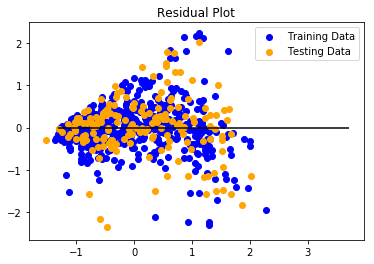

In [46]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4853274946917501, R2: 0.6073727830542146


In [48]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train_scaled ,y_train_scaled)
model.best_params_


C:\Users\emhar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 8}

In [51]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=8)
neigh.fit(X_train_scaled, y_train_scaled)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=8, p=2,
          weights='uniform')

In [52]:
training_score = neigh.score(X_train_scaled, y_train_scaled)
testing_score = neigh.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7159021509114655
Testing Score: 0.6066773282871225


In [53]:
MSE2 = mean_squared_error(y_test_scaled, neigh.predict(X_test_scaled))
print(MSE2)

0.4861871480861577


In [54]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 700, min_samples_split= 5, min_samples_leaf= 2, max_depth=20, random_state=6) 
  
# fit the regressor with x and y data 
regressor.fit(X_train_scaled, y_train_scaled.ravel())   

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
           oob_score=False, random_state=6, verbose=0, warm_start=False)

In [55]:
training_score = regressor.score(X_train_scaled, y_train_scaled)
testing_score = regressor.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9078960876650377
Testing Score: 0.6525483601061732


In [56]:
data = X = ML_df[["LotSizeAcres", "med/housing", "perc_fs", "median_income", "bachper", "summary/yearbuilt", "building/rooms/bathstotal", "building/rooms/beds"]]

print(X.shape, y.shape)
feature_names = data.columns
sorted(zip(regressor.feature_importances_, feature_names), reverse=True)

(664, 8) (664, 1)


[(0.14667714584896052, 'building/rooms/beds'),
 (0.09576570712212255, 'med/housing'),
 (0.09097276878810477, 'bachper'),
 (0.07009209512581253, 'LotSizeAcres'),
 (0.038280536963671126, 'median_income'),
 (0.03570099303055967, 'building/rooms/bathstotal'),
 (0.03479755281262841, 'perc_fs'),
 (0.033493289116235975, 'summary/yearbuilt')]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train_scaled, y_train_scaled.ravel())

In [ ]:
#rf_random.best_params_

In [ ]:
#explore api options
import http.client 

conn = http.client.HTTPSConnection("api.gateway.attomdata.com") 

headers = { 
    'accept': "application/json", 
    'apikey': "487ac4986deb86031b6d88f9505dfdc6", 
} 

ids="18471319108031"
conn.request("GET", "/propertyapi/v1.0.0/property/detail?id="+ ids, headers=headers) 

res = conn.getresponse() 
data = res.read() 

data1=data.decode("utf-8")
print(data1)

In [ ]:
import numpy
import pandas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# define base model
def baseline_model():
    #create model
    model = Sequential()
    model.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
# Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

seed = 7
numpy.random.seed(seed)
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=2)

In [ ]:

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X_train_scaled, y_train_scaled, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
import seaborn as sns
sns.pairplot(ML_df[['building/rooms/bathstotal','med/housing','bachper','summary/yearbuilt', 'perc_fs']])

In [ ]:
ML_df1['sale/amount/saleamt'].apply(lambda x: np.log1p(x)**2).hist(bins=50,label='a')
plt.legend()

In [ ]:
ML_df.hist(bins=50,figsize=(15,10))